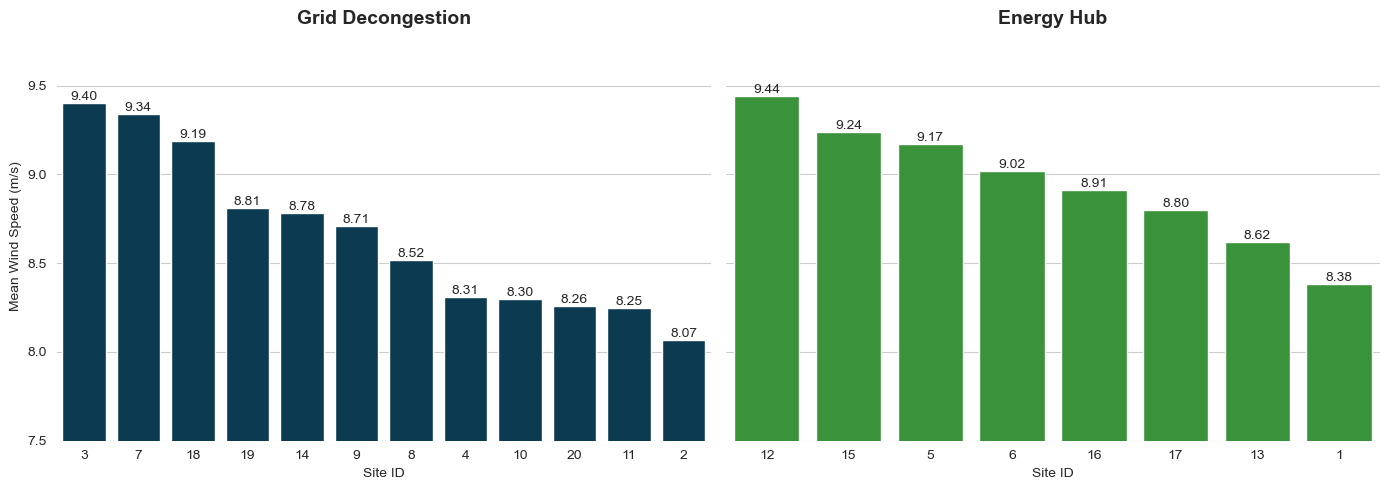

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define the initial data
data = {
    'Site ID': ['3', '18', '19', '14', '9', '8', '4', '10', '20', '11', '2', 
                '12', '7', '15', '5', '6', '16', '17', '13', '1'],
    'Wind Speed': [9.40, 9.19, 8.81, 8.78, 8.71, 8.52, 8.31, 8.30, 8.26, 8.25, 8.07, 
                   9.44, 9.34, 9.24, 9.17, 9.02, 8.91, 8.80, 8.62, 8.38],
    'Rationale': ['Grid Decongestion'] * 11 + ['Energy Hub'] * 9
}
df = pd.DataFrame(data)

# Update Site 7 to Grid Decongestion
df.loc[df['Site ID'] == '7', 'Rationale'] = 'Grid Decongestion'

# Set up the plot
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot Grid Decongestion data
grid_data = df[df['Rationale'] == 'Grid Decongestion'].sort_values('Wind Speed', ascending=False)
sns.barplot(data=grid_data, x='Site ID', y='Wind Speed', ax=axes[0], color='#003f5c')
axes[0].set_ylim(7.5, 9.8)  
axes[0].set_title('Grid Decongestion', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Mean Wind Speed (m/s)')
axes[0].bar_label(axes[0].containers[0], fmt='%.2f')

# Plot Energy Hub data
hub_data = df[df['Rationale'] == 'Energy Hub'].sort_values('Wind Speed', ascending=False)
sns.barplot(data=hub_data, x='Site ID', y='Wind Speed', ax=axes[1], color='#2ca02c')
axes[1].set_title('Energy Hub', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')
axes[1].bar_label(axes[1].containers[0], fmt='%.2f')

# Final layout adjustments
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

 Rank  Site ID     Region  Total CAPEX (£m)  NPV (£m)  LCOE (£/MWh)
    1        8    England            675.16    480.63         42.50
    2        1 N. Ireland            675.21    480.58         42.50
    3       11    England            675.23    480.57         42.50
    4       15   Scotland            675.26    480.53         42.50
    5       17 N. Ireland            675.30    480.49         42.50
    6       10    England            675.33    480.46         42.51
    7        4    England            675.44    480.35         42.51
    8        6   Scotland            675.61    480.19         42.52
    9       14      Wales            675.62    480.17         42.52
   10        9    England            675.64    480.15         42.52
   11        5 N. Ireland            676.01    479.78         42.54
   12       13   Scotland            676.15    479.64         42.54
   13       19    England            676.16    479.63         42.54
   14       18      Wales            676.36    4

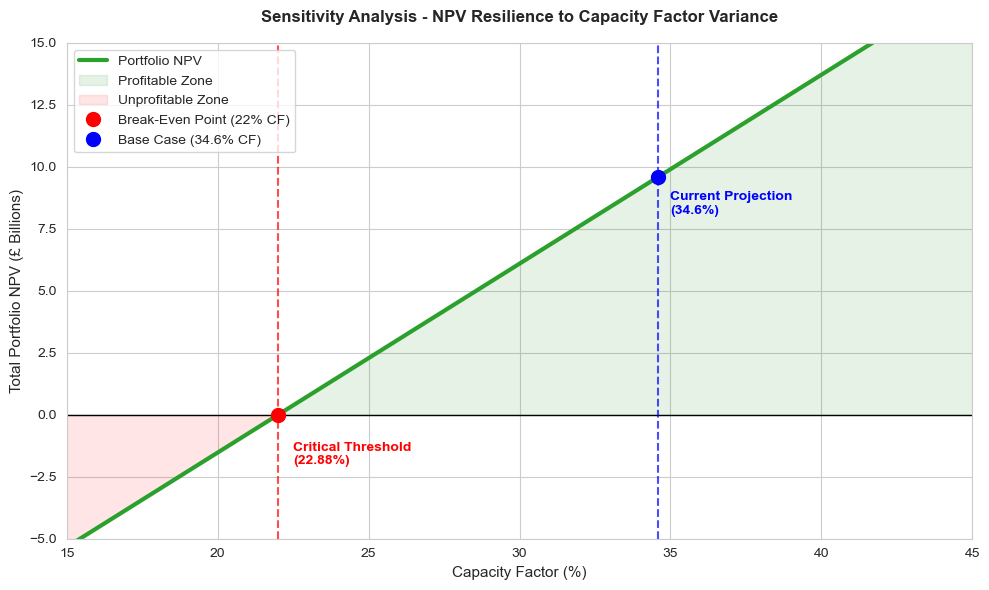

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



cf_range = np.linspace(15, 45, 100) 


# Assumption: At 34.6% CF (Baseline), NPV is approx £9.6bn (Total Portfolio).
# Formula derived: NPV rises as CF rises.
npv_values = (cf_range - 22) * (9.6 / (34.6 - 22))


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plt.plot(cf_range, npv_values, color='#2ca02c', linewidth=3, label='Portfolio NPV')

plt.fill_between(cf_range, npv_values, 0, where=(npv_values >= 0), 
                 color='green', alpha=0.1, interpolate=True, label='Profitable Zone')

plt.fill_between(cf_range, npv_values, 0, where=(npv_values < 0), 
                 color='red', alpha=0.1, interpolate=True, label='Unprofitable Zone')
plt.axvline(x=22, color='red', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='black', linewidth=1)
plt.plot(22, 0, 'ro', markersize=10, label='Break-Even Point (22% CF)')
baseline_npv = (34.6 - 22) * (9.6 / (34.6 - 22))
plt.axvline(x=34.6, color='blue', linestyle='--', alpha=0.7)
plt.plot(34.6, baseline_npv, 'bo', markersize=10, label='Base Case (34.6% CF)')

plt.text(22.5, -2, 'Critical Threshold\n(22.88%)', color='red', fontweight='bold')
plt.text(35, baseline_npv - 1.5, 'Current Projection\n(34.6%)', color='blue', fontweight='bold')

# Formatting
plt.title('Sensitivity Analysis - NPV Resilience to Capacity Factor Variance', fontsize=12, fontweight='bold', pad=15)
plt.xlabel('Capacity Factor (%)', fontsize=11)
plt.ylabel('Total Portfolio NPV (£ Billions)', fontsize=11)
plt.legend(loc='upper left')
plt.xlim(15, 45)
plt.ylim(-5, 15)

plt.tight_layout()
plt.savefig('Figure_13_Sensitivity.png', dpi=300)
plt.show()